# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

print "type of data - ",type(data),data.shape[0]
# Success - Display the first record
display(data.head(n=50))

type of data -  <class 'pandas.core.frame.DataFrame'> 45222


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [3]:
# TODO: Total number of records
n_records = None
print "n_records = ",data.shape[0]
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = None
#gf50 = data.loc[data['income']=='>50K']
#print "greater_than_50 = ",gf50.shape[0]
#n_greater_50k = gf50.shape[0]
n_greater_50k = sum(data['income']=='>50K')
print "n_greater = ",n_greater_50k

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = None
#le50 = data.loc[data['income']=='<=50K']
#n_at_most_50k = le50.shape[0]
n_at_most_50k = sum(data['income']=='<=50K')
print "n_at_most = ",n_at_most_50k
total =(float) (n_greater_50k + n_at_most_50k)

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = None
print "percentage - ",100*(float)(n_at_most_50k)/(float)(total)
greater_percent = 100*(float)(n_greater_50k)/(float)(total)
# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

n_records =  45222
n_greater =  11208
n_at_most =  34014
percentage -  75.2156030251
Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

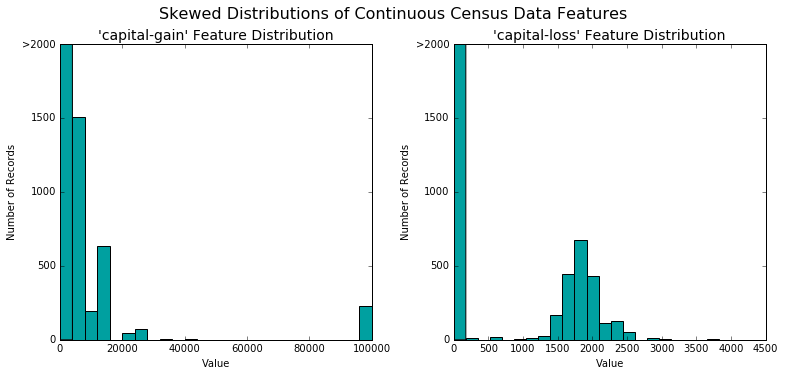

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

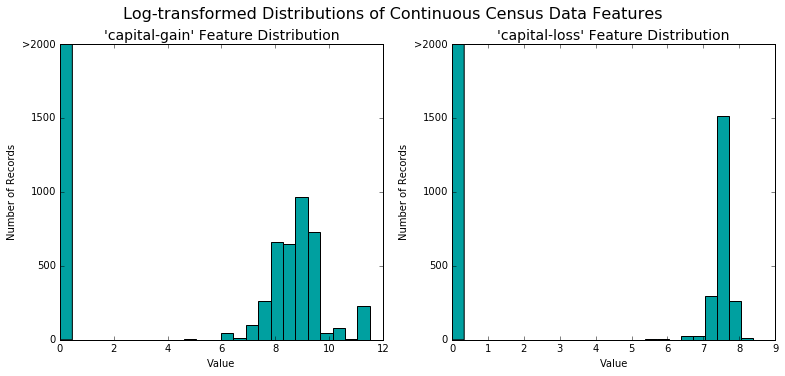

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

display(data.head(n = 4))
# Show an example of a record with scaling applied
display(features_raw.head(n = 4))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [7]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
#features = None
#print features_raw.head(2)

features = pd.get_dummies(features_raw)

#print "*****"
#print features.head(2)
# TODO: Encode the 'income_raw' data to numerical values
#income = None
#income = pd.get_dummies(income_raw)
from sklearn import preprocessing
le_income = preprocessing.LabelEncoder()
income = le_income.fit_transform(income_raw)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [8]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *UdacityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would is appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *UdacityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *UdacityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [9]:
# TODO: Calculate accuracy
#accuracy = None
accuracy = n_greater_50k/total
print "accuracy -",accuracy
# TODO: Calculate F-score using the formula above for beta = 0.5
true_positive = n_greater_50k
false_positive = n_at_most_50k
false_negative = 0
recall = 1
precision = (float)(true_positive)/(true_positive+false_positive)
#fscore = None
numerator = (float)(1.25*precision*recall)
denominator = (float)(0.25*precision+recall)
print "num,denom - ",numerator,denominator
fscore = (float)(numerator/denominator)

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf_dummy = DummyClassifier(random_state=42)
clf_dummy.fit(X_train,y_train)
predictions_test = clf_dummy.predict(X_test)
print "dummy accuracy - ",accuracy_score(y_test,predictions_test)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

accuracy - 0.247843969749
num,denom -  0.309804962187 1.06196099244
dummy accuracy -  0.629076838032
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supverised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: **
What is the ‘best’ ML approach to CharityML’s problem is somewhat subjective, and to that end I make the following as desirable attributes of ‘best’:
- CharityML’s goal is to raise the maximum money for its cause within a thin, relatively under-resourced organization, so the accuracy of donor identification needs to be “fairly” high (fairly being significantly higher than the f-score/accuracy indicated by naive prediction)
- While Charity organizations are largely altruistic, their work is often politicized. So the explanatory power of the ML algorithm is important to avoid malicious accusations (e.g. racial skewing of donors). We want to try at least one generative model, since they 
- If the ML approach for identifying donors is successful, we can anticipate follow-on ML calculations to involve larger datasets. Prediction and training time ( if either is executed on a ‘paid cloud’) translated to non-trivial cost to CharityML, and should be minimized wherever feasible. 
- The dataset (45K) is reasonably sized, but not huge (e.g. deep learning sized) and not very noisy  to our knowledge (e.g in terms of missing or erroneous data). So issues of sparse data or small training sets may be less important. In fact this piece of work (http://stackoverflow.com/questions/25665017/does-the-dataset-size-influence-a-machine-learning-algorithm) suggests that the learnig curve of most of the supervised learning algorithms we’ve worked with so far should flatten well within our 36K training set.

Accordingly, I'm picking the three algorithms below for a bakeoff:

**Naive Bayes**

*Positives:*
- Fast training. 
- Resilient to overfitting
- Good explanatory power
- Lots of industry use (so tweaks are better known, and stackoverflow more likely to yield answers) - https://www.quora.com/In-what-real-world-applications-is-Naive-Bayes-classifier-used

*Negatives:*
- Less favorable performance on larger data sets
- Prone to bias (doesn’t fit as well as data sets get large) 
- Some evidence combatting argument that naive bayes doesn’t do well on large data sets . http://ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf

**SVM**

*Positives.*
- Widely used http://www-labs.iro.umontreal.ca/~pift6080/H09/documents/papers/svm_tutorial.ppt
- Margin maximization makes it resilient to overfitting

*Negatives:*
- O-cubed training time might be expensive for a cash starved outfit like CharityML training
- Sensitive to outliers
- Widely used in industry for binary classification - 

**kNN**

*Positives:*
- Fast training
- Instance based, so model can evolve with new data
- Industry use: won Netflix prize - http://cs229.stanford.edu/proj2006/HongTsamis-KNNForNetflix.pdf

*Negatives:*
- Slow on prediction with larger data
- Susceptible to outliers and ‘spiky’ data
- Good performance on another binary classification task (spam filtering) http://www.cs.cmu.edu/~yvchen/doc/AI_final.pdf




### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import fbeta_score
    
    results = {}
    #print X_train.shape(sample_size)
 
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    #    learner = None

    learner.fit(X_train[:sample_size],y_train[:sample_size])
    
    end = time() # Get end time
    
    # TODO: Calculate the training time
    #results['train_time'] = None
    results['train_time'] = end - start
    
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    #predictions_test = None
    predictions_test = clf.predict(X_test)
    #predictions_train = None
    predictions_train = clf.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    #results['pred_time'] = None
    results['pred_time']=end - start
    
    # TODO: Compute accuracy on the first 300 training samples
    #results['acc_train'] = None
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
    
    # TODO: Compute accuracy on test set
    #results['acc_test'] = None
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    #results['f_train'] = None
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
    # TODO: Compute F-score on the test set
    #results['f_test'] = None
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    
    print "results = ",results
    
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results   
    # TODO: Get the predictions on the test set,
 

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Dependent on which algorithms you chose, the following implementation may take some time to run!

samples_100 =  36177
X_train shape =  (36177, 103)
y_train shape =  (36177,)
ytrain 0 =  [0 0 0 ..., 0 1 0]
clf name - GaussianNB
results =  {'pred_time': 0.023921966552734375, 'f_test': 0.48479849163327832, 'train_time': 0.003988981246948242, 'acc_train': 0.54333333333333333, 'acc_test': 0.51663902708678833, 'f_train': 0.42497376705141654}
GaussianNB trained on 361 samples.
results =  {'pred_time': 0.017582178115844727, 'f_test': 0.42320754716981129, 'train_time': 0.006320953369140625, 'acc_train': 0.33000000000000002, 'acc_test': 0.32404643449419568, 'f_train': 0.33498759305210918}
GaussianNB trained on 3617 samples.
results =  {'pred_time': 0.018261194229125977, 'f_test': 0.56382124698956382, 'train_time': 0.07380390167236328, 'acc_train': 0.64333333333333331, 'acc_test': 0.63957987838584851, 'f_train': 0.48064918851435706}
GaussianNB trained on 36177 samples.
clf name - KNeighborsClassifier
results =  {'pred_time': 0.5018131732940674, 'f_test': 0.57631318136769083, 'train_time': 0.

//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


results =  {'pred_time': 0.2147970199584961, 'f_test': 0.0, 'train_time': 0.009550094604492188, 'acc_train': 0.72999999999999998, 'acc_test': 0.74571586511885024, 'f_train': 0.0}
SVC trained on 361 samples.
results =  {'pred_time': 1.8213238716125488, 'f_test': 0.53750345972875724, 'train_time': 0.7809231281280518, 'acc_train': 0.82666666666666666, 'acc_test': 0.81525704809286903, 'f_train': 0.69965870307167244}
SVC trained on 3617 samples.
results =  {'pred_time': 16.654239177703857, 'f_test': 0.58851298190401258, 'train_time': 88.09517407417297, 'acc_train': 0.83666666666666667, 'acc_test': 0.82653399668325045, 'f_train': 0.71428571428571419}
SVC trained on 36177 samples.


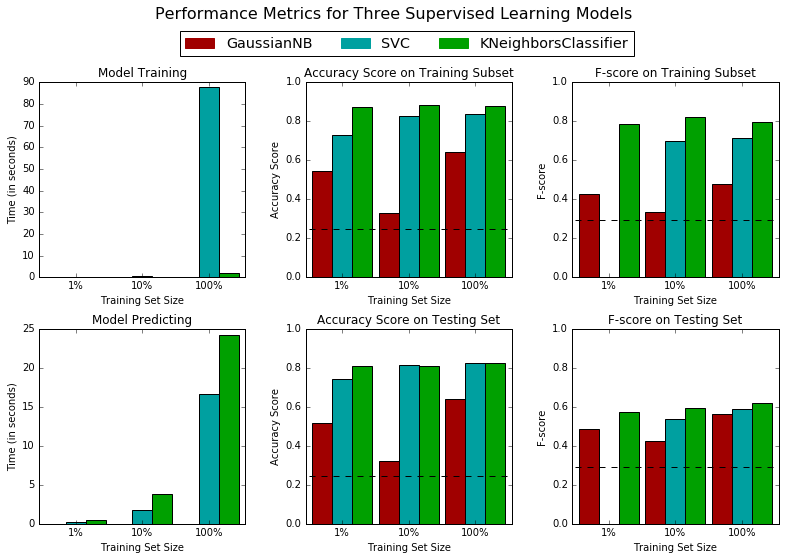

In [11]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# TODO: Initialize the three models
#clf_A = None
clf_A= GaussianNB()
#clf_B = None
clf_B=KNeighborsClassifier()
#clf_C = None
clf_C = svm.SVC()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
#samples_1 = None
samples_1 = int(len(X_train)*0.01)
#samples_10 = None
samples_10 = int(len(X_train)*0.1)
#samples_100 = None
samples_100 = int(len(X_train))
print "samples_100 = ",samples_100
print "X_train shape = ",X_train.shape
print "y_train shape = ",y_train.shape
print "ytrain 0 = ",y_train

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    print "clf name -",clf_name
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **
For CharityML, we need a ML algorithm that is 
- a) highly accurate in identifying promising donors, 
- b) reasonable in compute cost for the kinds of datasets we might encounter in the future, 
- c)  good at explaining the conclusions it arrived at and 
- d)suitable to the data set. 

The data itself is reasonably clean and moderate in size, with no noticeable irregularities (e.g. lots of outliers). So I'm going to focus in my recommendation on criteria a, b and c. 

Based on the detailed metrics below on Naive Bayes (NB), kNN and SVM, **I'm going to recommend SVMs** for the following reasons:
 - NB, while blazingly fast on training and prediction, is vastly inferior to both kNN and SVM on accuracy and f_score.
 - kNN and SVM are neck-and-neck in many ways. they both are pretty accurate (82-83%) and have similar f-scores (.59, .60). 
 - both kNN and SVM have issues in prediction/training time. exponential increase in SVM training time with training set growth is a concern. for kNNs, exponential growth in prediction time is a concern.
 - theoretical work on SVM training time https://www.quora.com/What-is-the-computational-complexity-of-an-SVM suggests that concern is well founded, but also something where there are known techniques to improve (e.g. regularization)
 - the 5% difference in acc_train and acc_test on kNN suggests that it is overfitting, where SVM is delivering good performance without overfitting
 - since kNN's are non-generalizing, they may produce better explanations that generalizing schemes like SVM. however, keeping the SVM kernels simple should help us explain the conclusions despite generalization

All told I feel that even though SVMs are 'compute hungry', they provide good accuracy without overfitting. SVMs are widely used in the industry, and so more optimizable. While SVM and kNN may look similar in performance at the larger datasets, kNN is flattening while SVM is still trending up.

The raw data is below:
**Naive Bayes**
Accuracy_test = .60 for 36K training set, trending up steeply
F_test = .54 but still trending up with training size
Prediction Time. orders of magnitude faster than kNN and SVM
Training time. fast (0.06 seconds for 36K training set) and grew sub-linearly with training size


**kNN**
- Accuracy_test = 0.82 but flattening out
- F_test = 0.61 but beginning to flatten out
- Prediction time. High but seems to grow exponentially
- Training time. Not as fast as NB, but fast enough - 1.7 seconds for 36K training set
- Larger difference between acc_train and acc_test (suggests some overfitting)

**SVM**
- Accuracy_test = 0.83, flattening out
- F_test = 0.59 but still trending up with training set size
- Prediction time. High but seems to grow linearly
- Training time. Exponential slowdown with training set size - 84 seconds for 36K training set
- Small difference between acc_train and acc_test (suggests very little overfitting)


### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** 
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression. We'll focus here on the more common usage of SVM's that is in classification. In classification (assuming the data is in two dimensions), the idea is to find a line that separates the plane into zones that represent 'yes' (members of the class) and 'no' (not members of the class). When data has a lot of dimensions (103 in the CharityML case) the analog to that dividing line is what is called a 'hyperplane'. Another intuition for hyperplane is that in 3-dimensions the hyperplane is a 'plane' (think of a glass sheet that separates members of the class from non-members). 

![title](margin.png)

Another important SVM concept after hyperplanes is *margin*. Back to the 2-dimensional example, data in 2-dimensions can be separated by many different lines. The *margin* is the distance between the line and the closest point(s) on either side (members zone and non-member zone). SVM chooses the line that *maximizes the margin* as the optimal dividing line (or hyperplane) for classification. Intuitively a *maximum margin hyperplane* separates the class and non-class members without *overfitting* (i.e. getting too close to one side or the other). 

![title](messy data.png)

The third thing to know about SVM's is *kernels*. Many datasets don't have a clean dividing line (margin) like the first picture, and might look more like the second (mingled) picture. In this picture (right above), there is no straight line you can draw separates legitimate members of the class from non-members.
You can think of *kernels* as adding a dimension to 'levitate' some of the points (as shown below) so that points that could only be separated by a squiggly line can now be separated by a (hyper)planes that is linear and has no squiggles in it

![title](kernel solution.png) 


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [12]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score

# TODO: Initialize the classifier
#clf = None
clf = svm.SVC()

# TODO: Create the parameters list you wish to tune
#parameters = None
#C_range = 10.0 ** np.arange(-6, 6)
#gamma_range = 10.0 ** np.arange(-6, 6)
C_range = 10.0 ** np.arange(-1, 1)
gamma_range = 10.0 ** np.arange(-1, 1)

param_grid = dict(gamma=gamma_range.tolist(), C=C_range.tolist())
print "bp0"

# TODO: Make an fbeta_score scoring object
#scorer = None
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
#grid_obj = None
grid_obj = GridSearchCV(clf, param_grid,scoring=scorer)
print "bp1"
# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = None
samples_size = 3000
X_train_short = X_train[:samples_size]
y_train_short = y_train[:samples_size]
X_test_short = X_test[:samples_size]
y_test_short = y_test[:samples_size]

#X_train_short = X_train
#y_train_short = y_train
#X_test_short = X_test
#y_test_short = y_test

grid_fit = grid_obj.fit(X_train_short,y_train_short)


print "bp2"

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train_short, y_train_short)).predict(X_test_short)


print "bp3"
best_predictions = best_clf.predict(X_test_short)

print "bp4"

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test_short, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test_short, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test_short, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test_short, best_predictions, beta = 0.5))

bp0
bp1
bp2
bp3
bp4
Unoptimized model
------
Accuracy score on testing data: 0.8263
F-score on testing data: 0.6697

Optimized Model
------
Final accuracy score on the testing data: 0.8250
Final F-score on the testing data: 0.6626


### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

Training set size 36177. C and gamma range -1,1

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |       .2478         |       0.8265      |   0.8344        |
| F-score        |       .2917         |       0.6717      |   0.6888        |

Training set size 3000. C and gamma range -3,3

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |       .2478         |       0.8275      |   0.8325        |
| F-score        |       .2917         |       0.6794      |   0.6873        |

Training set size 3000. C and gamma range -4,4

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |       .2478         |        0.8263     |   0.8373        |
| F-score        |       .2917         |        0.6697     |   0.6978        |

Training set size 1500. C and gamma range -6,6

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |       .2478         |       .8073       |     .8460       |
| F-score        |       .2917         |       .6299       |     .7275       |


**Answer: ** Running Grid Search on 100% of the training set (36K) was computationally challenging on my Macbook Pro. So I did an experiment trading off the 'width' of the grid (number of C and gamma combinations I tried) with the size of the training set I tried it on. Based on 6 runs (of which 3 are captured above), my conclusion is that given the same compute power, it is better to search more broadly with a smaller data set (as long as it is above say 1K data items) than vice-versa.

In the case of exploring 6 values each of gamma and C on a 1500 entry data set - optimization improved the accuracy by 5% (.81 to .85)and the f-score by 20% (.62 to .72)

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them?_

**Answer:** My intuitive ranking was as below -
- occupation : white collar workers have higher likelihood of making >50K
- country : same profession pays substantially more in US than developing countries,
- education_level: educated people make more and get faster raises
- education-num: in hindsight, this is a bit redundant to education_level
- workclass: private sector likely to pay more than other

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

[ 0.10374073  0.09108141  0.24003726  0.12516522  0.04845309  0.00622949
  0.          0.          0.          0.00739921  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.00462457  0.01803371  0.          0.          0.00727117  0.          0.
  0.00876326  0.          0.04938558  0.1518285   0.          0.          0.
  0.          0.          0.          0.          0.015557    0.02298784
  0.01039116  0.00884371  0.01372173  0.00080065  0.00559305  0.          0.
  0.00552373  0.          0.          0.00402171  0.          0.01134158
  0.          0.01913477  0.          0.          0.00337441  0.          0.
  0.          0.00785984  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00883565  0.       

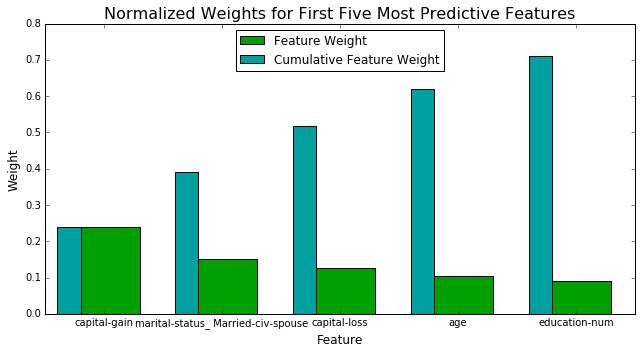

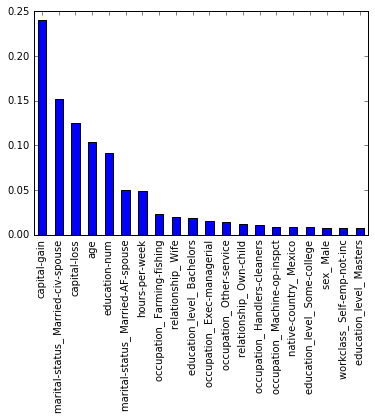

In [15]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# TODO: Train the supervised model on the training set 
model = None
model = AdaBoostClassifier(
                         algorithm="SAMME",
                         n_estimators=200)
model_fit = model.fit(X_train,y_train)
print model_fit.feature_importances_
print "length - ",len(model_fit.feature_importances_)
# TODO: Extract the feature importances
#importances = None
importances = model_fit.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)


n = 20
#fi = model.feature_importances_
pd.Series(importances, index=X_train.columns).sort_values(ascending=False)[:n].plot(kind='bar');

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**My thoughts (based on looking at the first 50 entries in the training set) were way  off base from what the visualization revealed. 
- I felt intuitively that capital-gain (and loss) would be important, but these fields were too sparse in the first 50 entries to draw definitive conclusions
- Intuitively, i felt strongly that age should be in the top 5 but the dataset from which i drew conclusion had a number of older folk with high school education (or less) made it hard to make that case
- I was correct in including education, but perhaps redundantly included both education_level and education-num
- I (incorrectly?) included country, because I felt that the same occupation has much higher compensation in 'first world' countries (e.g. US) versus less developed (e.g. Cuba). This seems a strong conclusion on my initial data set
- I saw a much stronger correlation to occupation (e.g. executive/managerial make substantially more) and am surprised that didn't manifest itself.
- I didn't pick marital status (married) figuring it was strongly associated with age


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [16]:
# Import functionality for cloning a model
from sklearn.base import clone

#hack to get things to work on resource limited machine
#X_train = X_train_short
#y_train = y_train_short
#X_test = X_test_short
#y_test = y_test_short

X_train_short = X_train
y_train_short = y_train
X_test_short = X_test
y_test_short = y_test

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)
print "reduced predictions --",reduced_predictions
print "shapes of y_test, best_predictions -- ", y_test.shape, best_predictions.shape
# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

reduced predictions -- [1 0 0 ..., 0 0 0]
shapes of y_test, best_predictions --  (9045,) (9045,)
Final Model trained on full data
------
Accuracy on testing data: 0.8344
F-score on testing data: 0.6888

Final Model trained on reduced data
------
Accuracy on testing data: 0.8286
F-score on testing data: 0.6758


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:** by training with only 5 features, the f-score and accuracy of the model are reduced slightly (by about 1%) but with faster training times. also interesting that increasing the number of features used to 9 (still below 13) *increases* both accuracy and f-score slightly! ( Accuracy: 0.8356, F-score: 0.6935). This might be due to some functional dependencies between parameter, and noise in the 4 added attributes. The improvement is interesting but at 0.2-0.3% not statistically significant perhaps.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.